<a href="https://colab.research.google.com/github/rameshveer/ML_Algorithms/blob/master/Back_order_Prediction/Back_Order_Perdiction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Column Description

* sku – 		 	Random ID for the product
* national_inv –   	Current inventory level for the part
* lead_time – 	 	Transit time for product (if available)
* in_transit_qty – 	Amount of product in transit from source
* forecast_3_month – 	Forecast sales for the next 3 months
* forecast_6_month – 	Forecast sales for the next 6 months
* forecast_9_month – 	Forecast sales for the next 9 months
* sales_1_month – 	Sales quantity for the prior 1 month time period
* sales_3_month – 	Sales quantity for the prior 3 month time period
* sales_6_month – 	Sales quantity for the prior 6 month time period
* sales_9_month – 	Sales quantity for the prior 9 month time period
* min_bank – 		Minimum recommend amount to stock
* potential_issue – 	Source issue for part identified
* pieces_past_due – 	Parts overdue from source
* perf_6_month_avg – 	Source performance for prior 6 month period
* perf_12_month_avg – 	Source performance for prior 12 month period
* local_bo_qty – 		Amount of stock orders overdue
* deck_risk – 		Part risk flag
* oe_constraint – 	Part risk flag
* ppap_risk – 		Part risk flag
* stop_auto_buy – 	Part risk flag
* rev_stop – 		Part risk flag
* went_on_backorder – 	Product actually went on backorder. This is the target value.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df = pd.read_csv('/content/drive/MyDrive/Training_Dataset_v2.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [12]:
df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [13]:
df.shape

(1687861, 23)

### Checking for missing values

In [14]:
df.isnull().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

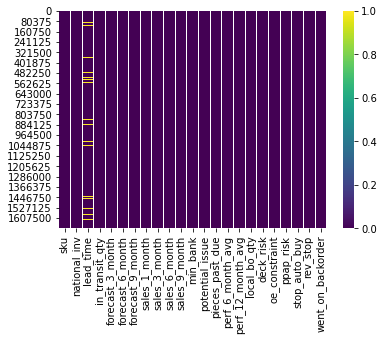

In [15]:
sns.heatmap(df.isnull(), cmap='viridis')

In [16]:
null_values = [feature for feature in df.columns if df[feature].isnull().sum()]

In [17]:
null_values

['national_inv',
 'lead_time',
 'in_transit_qty',
 'forecast_3_month',
 'forecast_6_month',
 'forecast_9_month',
 'sales_1_month',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month',
 'min_bank',
 'potential_issue',
 'pieces_past_due',
 'perf_6_month_avg',
 'perf_12_month_avg',
 'local_bo_qty',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder']

In [18]:
df['national_inv'] = df['national_inv'].fillna(df['national_inv'].mean())
df['lead_time'] = df['lead_time'].fillna(df['lead_time'].mean())
df['in_transit_qty'] = df['in_transit_qty'].fillna(df['in_transit_qty'].mean())
df['forecast_3_month'] = df['forecast_3_month'].fillna(df['forecast_3_month'].mean())
df['forecast_6_month'] = df['forecast_6_month'].fillna(df['forecast_6_month'].mean())
df['forecast_9_month'] = df['forecast_9_month'].fillna(df['forecast_9_month'].mean())
df['sales_1_month'] = df['sales_1_month'].fillna(df['sales_1_month'].mean())
df['sales_3_month'] = df['sales_3_month'].fillna(df['sales_3_month'].mean())
df['sales_6_month'] = df['sales_6_month'].fillna(df['sales_6_month'].mean())
df['sales_9_month'] = df['sales_9_month'].fillna(df['sales_9_month'].mean())
df['pieces_past_due'] = df['pieces_past_due'].fillna(df['pieces_past_due'].mean())
df['perf_6_month_avg'] = df['perf_6_month_avg'].fillna(df['perf_6_month_avg'].mean())
df['perf_12_month_avg'] = df['perf_12_month_avg'].fillna(df['perf_12_month_avg'].mean())
df['local_bo_qty'] = df['local_bo_qty'].fillna(df['local_bo_qty'].mean())
df['min_bank'] = df['min_bank'].fillna(df['min_bank'].mean())

In [19]:
categorical_col = [feature for feature in df.columns if df[feature].dtypes == 'O']
categorical_col

['sku',
 'potential_issue',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder']

In [20]:
df.potential_issue.unique()

array(['No', 'Yes', nan], dtype=object)

In [21]:
df.potential_issue.value_counts()

No     1686953
Yes        907
Name: potential_issue, dtype: int64

In [22]:
df['potential_issue'] = df.potential_issue.fillna('No')

In [23]:
df.potential_issue.value_counts()

No     1686954
Yes        907
Name: potential_issue, dtype: int64

In [24]:
df['deck_risk'] = df.deck_risk.fillna('No')

In [25]:
df.oe_constraint.value_counts()

No     1687615
Yes        245
Name: oe_constraint, dtype: int64

In [26]:
df['oe_constraint'] = df.oe_constraint.fillna('No')

In [27]:
df.ppap_risk.value_counts()

No     1484026
Yes     203834
Name: ppap_risk, dtype: int64

In [28]:
df['ppap_risk'] = df.ppap_risk.fillna('No')

In [29]:
df.stop_auto_buy.value_counts()

Yes    1626774
No       61086
Name: stop_auto_buy, dtype: int64

In [30]:
df['stop_auto_buy'] = df.stop_auto_buy.fillna('No')

In [31]:
df.rev_stop.value_counts()

No     1687129
Yes        731
Name: rev_stop, dtype: int64

In [32]:
df['rev_stop'] = df.rev_stop.fillna('No')

In [33]:
df.went_on_backorder.value_counts()

No     1676567
Yes      11293
Name: went_on_backorder, dtype: int64

In [34]:
df['went_on_backorder'] = df.went_on_backorder.fillna('No')

In [35]:
df.isnull().any()

sku                  False
national_inv         False
lead_time            False
in_transit_qty       False
forecast_3_month     False
forecast_6_month     False
forecast_9_month     False
sales_1_month        False
sales_3_month        False
sales_6_month        False
sales_9_month        False
min_bank             False
potential_issue      False
pieces_past_due      False
perf_6_month_avg     False
perf_12_month_avg    False
local_bo_qty         False
deck_risk            False
oe_constraint        False
ppap_risk            False
stop_auto_buy        False
rev_stop             False
went_on_backorder    False
dtype: bool

In [36]:
categorical_col

['sku',
 'potential_issue',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder']

### Label Encoding the categorical values

In [37]:
df.potential_issue.value_counts()

No     1686954
Yes        907
Name: potential_issue, dtype: int64

In [38]:
df['potential_issue'] = df['potential_issue'].map({'No' : 0, 'Yes' : 1}).astype('int')
df['deck_risk'] = df['deck_risk'].map({'No' : 0, 'Yes' : 1}).astype('int')
df['oe_constraint'] = df['oe_constraint'].map({'No' : 0, 'Yes' : 1}).astype('int')
df['ppap_risk'] = df['ppap_risk'].map({'No' : 0, 'Yes' : 1}).astype('int')
df['stop_auto_buy'] = df['stop_auto_buy'].map({'No' : 0, 'Yes' : 1}).astype('int')
df['went_on_backorder'] = df['went_on_backorder'].map({'No' : 0, 'Yes' : 1}).astype('int')
df['rev_stop'] = df['rev_stop'].map({'No' : 0, 'Yes' : 1}).astype('int')

In [39]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,0,0,0,1,0,0
1,1043384,2.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.99,0.0,0,0,0,1,0,0
2,1043696,2.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
3,1043852,7.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,0,0,0,1,0,0
4,1044048,8.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687861 non-null  float64
 2   lead_time          1687861 non-null  float64
 3   in_transit_qty     1687861 non-null  float64
 4   forecast_3_month   1687861 non-null  float64
 5   forecast_6_month   1687861 non-null  float64
 6   forecast_9_month   1687861 non-null  float64
 7   sales_1_month      1687861 non-null  float64
 8   sales_3_month      1687861 non-null  float64
 9   sales_6_month      1687861 non-null  float64
 10  sales_9_month      1687861 non-null  float64
 11  min_bank           1687861 non-null  float64
 12  potential_issue    1687861 non-null  int64  
 13  pieces_past_due    1687861 non-null  float64
 14  perf_6_month_avg   1687861 non-null  float64
 15  perf_12_month_avg  1687861 non-n

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


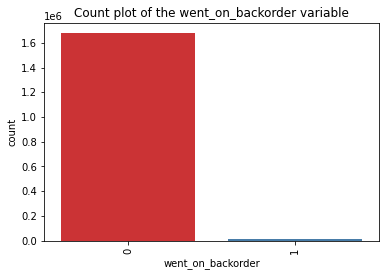

In [41]:
sns.countplot(df['went_on_backorder'], palette='Set1')
plt.title("Count plot of the went_on_backorder variable")
plt.xticks(rotation = 90)
plt.show()

* We can see that our dataset is imbalanced so we need to balance our dataset first

In [42]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,0,0,0,1,0,0
1,1043384,2.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.99,0.0,0,0,0,1,0,0
2,1043696,2.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
3,1043852,7.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,0,0,0,1,0,0
4,1044048,8.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0


In [43]:
df = df.drop(['sku'], axis=1)

In [44]:
df.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,0,0,0,1,0,0
1,2.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.99,0.0,0,0,0,1,0,0
2,2.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
3,7.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,0,0,0,1,0,0
4,8.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0


In [45]:
x = df.drop(['went_on_backorder'], axis=1).values
y = df['went_on_backorder'].values

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [48]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [49]:
sm = SMOTE(random_state=12)
X_train_s, y_train_s = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [50]:
X_train_s.shape, y_train_s.shape

((2246690, 21), (2246690,))

In [51]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_s)))

Original dataset shape Counter({0: 1676568, 1: 11293})
Resampled dataset shape Counter({0: 1123345, 1: 1123345})


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


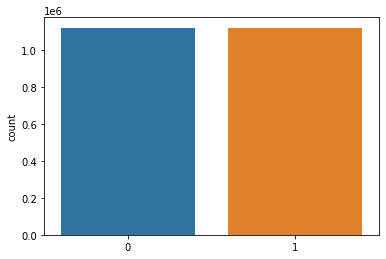

In [52]:
sns.countplot(y_train_s)

# Model Construction

    The following code blocks construct the Machine Learning models using the training dataset

## 1. Logistic Regression

    The following code builds and measures the prediction accuracy score of the Logistic Regression model 

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
clf_lrs = LogisticRegression()

In [55]:
clf_lrs.fit(X_train_s,y_train_s)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
lr_y_pred = clf_lrs.predict(X_test)

Evaluation of Model:

In [57]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

In [58]:
confusion_matrix(y_test, lr_y_pred)

array([[360487, 192736],
       [   494,   3278]])

In [59]:
clf_lrs_a = accuracy_score(y_test, lr_y_pred)
clf_lrs_a

0.6530848571351628

In [60]:
clf_lrs_r = recall_score(y_test, lr_y_pred)
clf_lrs_r

0.869034994697773

## 2. Decision Tree


In [61]:
from sklearn.tree import DecisionTreeClassifier
model_dtree=DecisionTreeClassifier()
model_dtree.fit(X_train_s,y_train_s)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [62]:
dt_y_pred = model_dtree.predict(X_test)

In [63]:
dtree_r = recall_score(y_test, dt_y_pred)
dtree_r

0.41755037115588545

## 3. Random Forest


In [64]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=101)
model_rf.fit(X_train_s,y_train_s)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [65]:
rf_y_pred = model_rf.predict(X_test)

In [66]:
rf_r = recall_score(y_test, rf_y_pred)
rf_r

0.4323966065747614

4. SVC - was not included in modelling due to high no. of samples involved in the dataset. SVC is time consuming for huge datasets.

## 5. XGBoost

In [67]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(tree_method = "gpu_hist", max_depth = 5, n_estimators = 1000, learning_rate = 0.1, n_jobs = -1)

In [68]:
xgb_clf.fit(X_train_s,y_train_s)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

In [69]:
xgb_y_pred = xgb_clf.predict(X_test)

In [70]:
confusion_matrix(y_test, xgb_y_pred)

array([[546582,   6641],
       [  2225,   1547]])

In [71]:
xgb_r = recall_score(y_test, xgb_y_pred)
xgb_r

0.4101272534464475

## Machine Learning Models - Recall_Score comparison

    The following code blocks compares the performance of the different constructed ML models by measuring their recall_score

In [74]:
# data of Models & Accuracy

acc_data = [['Logistic Regression', clf_lrs_r], ['Decision Tree', dtree_r],
            ['Random Forrest', rf_r], ['XGBoost', xgb_r] ] 

In [75]:
# Create DataFrame for Models & Accuracy

acc_df = pd.DataFrame(acc_data, columns = ['Model', 'Recall_Score']) 
acc_df

,Model,Recall_Score
0,Logistic Regression,0.869035
1,Decision Tree,0.417550
2,Random Forrest,0.432397
3,XGBoost,0.410127


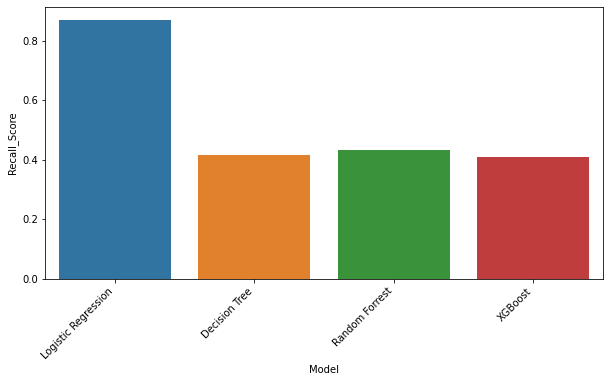

In [76]:
#Plot Model vs Accuracy

plt.figure(figsize=(10,5))
acc_chart = sns.barplot(x="Model", y="Recall_Score", data=acc_df)
acc_chart.set_xticklabels(acc_chart.get_xticklabels(), rotation=45, horizontalalignment='right')
acc_chart

### Inference:

    Based on the recall_score of various models, 
    we can choose ##Logistic Regression for our business case which yeilds best #recall_score of 0.86.


In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lr_y_pred)
cm

array([[360487, 192736],
       [   494,   3278]])

Text(33.0, 0.5, 'Predicted Values')

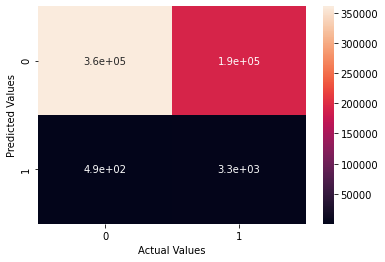

In [79]:
sns.heatmap(cm, annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')